# **Table of Contents**
* [Q 1](#section_1)
* [Q 2](#section_2)
* [Q 3](#section_3)
* [Q 4](#section_4)
* [Q 5](#section_5)
* [Q 6](#section_6)

In [1]:
import numpy             as   np
import pandas            as   pd
import matplotlib.pyplot as   plt
import seaborn           as   sns

import warnings
warnings.simplefilter("ignore")

<a id='section_1'></a>
# Q 1

In [2]:
data = { 'EMPID'  : ['E001','E002','E003','E004','E005','E006','E007','E008','E009','E010'],
         'Gender' : ['M','F','F','M','F','M','M','F','M','M'],
         'Age'    : [34,40,37,30,44,36,32,26,32,36],
         'Sales'  : [123,114,135,139,117,121,133,140,133,133],
         'BMI'    : ['Normal','Overweight','Obesity','Underweight','Underweight','Normal','Obesity','Normal','Normal','Underweight'],
         'Income' : [350,450,169,189,183,80,166,120,75,40]
       }    

df = pd.DataFrame (data)

df.sample(3)

,EMPID,Gender,Age,Sales,BMI,Income
1,E002,F,40,114,Overweight,450
5,E006,M,36,121,Normal,80
8,E009,M,32,133,Normal,75


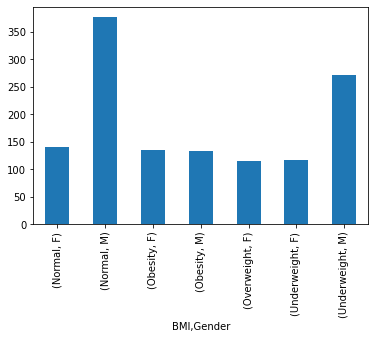

In [3]:
df.groupby (['BMI','Gender'])   ['Sales'].sum()    .plot (kind='bar')

<a id='section_2'></a>
# Q 2

In [4]:
df = pd.read_csv ('datasets/Titanic.csv')

df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S


In [5]:
names = df['Name']

names.sample(3)

676        Sawyer, Mr. Frederick Charles
656                Radeff, Mr. Alexander
119    Andersson, Miss. Ellis Anna Maria
Name: Name, dtype: object

In [6]:
for i in names: 
    
    new_name = i.split(',') 
    
    fname  = new_name[-1].split('.')
    
    titles = fname[0]
    
df['Titles'] = titles    

In [7]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Titles
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,Mr
397,398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S,Mr
254,255,0,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,Mr


<a id='section_3'></a>
# Q 3

In [8]:
df.drop (['PassengerId','Ticket','Name'] , inplace=True , axis=1)

### a

In [9]:
# 1

pd.pivot_table ( df, index=['Sex'] )


,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


### b

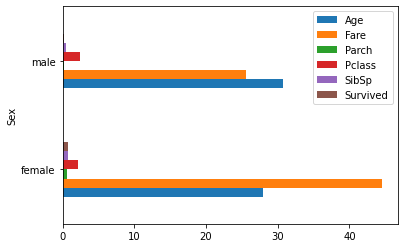

In [10]:
pd.pivot_table ( df, index=['Sex'] )   . plot (kind='barh')


### c

In [11]:
pd.pivot_table ( df  ,  index=['Sex','Pclass'] )


Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### d

In [12]:
# 1 col , 1 agg

pd.pivot_table ( df ,  index=['Sex','Pclass']  ,  aggfunc = {'Survived' : np.mean} )


Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### e

In [13]:
# 1 col , many agg

pd.pivot_table ( df ,  index=['Sex','Embarked']  , values=['Fare'] ,  aggfunc = ['max','mean','min'])


max       mean     min
                     Fare       Fare    Fare
Sex    Embarked                             
female C         512.3292  75.169805  7.2250
       Q          90.0000  12.634958  6.7500
       S         263.0000  38.740929  7.2500
male   C         512.3292  48.262109  4.0125
       Q          90.0000  13.838922  6.7500
       S         263.0000  21.711996  0.0000

### f

In [14]:
# 2 col , 2 agg
    
pd.pivot_table ( df  ,  index=['Sex','Pclass']  , aggfunc = {'Age':np.mean , 'Survived':np.sum}  )


Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

<a id='section_4'></a>
# Q 4

In [15]:
df  =  pd.read_excel ( 'datasets/America.xlsx' , sheet_name=None , index_col=0 )

In [16]:
type(df)

dict

In [17]:
df.keys()

dict_keys(['north_america_2000_2010', 'south_america_2000_2010', 'am_2011', 'am_2012', 'am_2013', 'am_2014', 'am_2015'])

In [18]:
# 1

south  =  pd.read_excel ('datasets/America.xlsx' , sheet_name='south_america_2000_2010' , index_col=0 )
north  =  pd.read_excel ('datasets/America.xlsx' , sheet_name='north_america_2000_2010' , index_col=0 )


pd.concat ( [north,south] , join='outer' , axis=0)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country,,,,,,,,,,,
Canada,1779.0,1771.0,1754.0,1740.0,1760.0,1747,1745.0,1741.0,1735,1701.0,1703.0
Mexico,2311.2,2285.2,2271.2,2276.5,2270.6,2281,2280.6,2261.4,2258,2250.2,2242.4
USA,1836.0,1814.0,1810.0,1800.0,1802.0,1799,1800.0,1798.0,1792,1767.0,1778.0
Chile,2263.0,2242.0,2250.0,2235.0,2232.0,2157,2165.0,2128.0,2095,2074.0,2069.6


In [19]:
# 2

a  =  pd.read_excel  ('datasets/America.xlsx' , sheet_name='am_2011' , index_col=0)
b  =  pd.read_excel  ('datasets/America.xlsx' , sheet_name='am_2012' , index_col=0)
c  =  pd.read_excel  ('datasets/America.xlsx' , sheet_name='am_2013' , index_col=0)
d  =  pd.read_excel  ('datasets/America.xlsx' , sheet_name='am_2014' , index_col=0)
e  =  pd.read_excel  ('datasets/America.xlsx' , sheet_name='am_2015' , index_col=0)


pd.concat ( [a,b,c,d,e] , join='inner' , axis=1 )

,2011,2012,2013,2014,2015
Country,,,,,
Canada,1700.0,1713.0,1707.0,1703.0,1706.0
Chile,2047.4,2024.0,2015.3,1990.1,1987.5
Mexico,2250.2,2225.8,2236.6,2228.4,2246.4
USA,1786.0,1789.0,1787.0,1789.0,1790.0


<a id='section_5'></a>
# Q 5

In [20]:
d   =    { 
            'Employee':  { 'user_id': [10,20,30] , 'Age': [34,26,45], 'Name': ['Akash','Manish','Rehan'], 
                            'Sales' : [34,45,123], 'Salary':[342,453,670] 
                         } ,
           
            'Student' :  { 'stud_id':[21,45,32]    ,  'Age': [21,21,20], 'Name': ['Riya','Nitin','Kiran'], 
                            'Gender':['F','M','F'] ,'Course':['DL','ML','DL']
                         } ,
    
            'Passenger': { 'pass_id':[1241,3214,3467], 'Age':[43,23,19], 'Name':['Geeta','Mohan','Abhi'], 
                            'Destination':['Delhi','Indore','Bhopal'], 'Fare':[1500,1300,1000]
                         } 
           }

In [21]:
df  =  pd.DataFrame.from_dict    ( {  (i,j): d[i][j]   for i in d.keys()    for j in d[i].keys()  } )

df

Employee                          Student                           \
   user_id Age    Name Sales Salary stud_id Age   Name Gender Course   
0       10  34   Akash    34    342      21  21   Riya      F     DL   
1       20  26  Manish    45    453      45  21  Nitin      M     ML   
2       30  45   Rehan   123    670      32  20  Kiran      F     DL   

  Passenger                               
    pass_id Age   Name Destination  Fare  
0      1241  43  Geeta       Delhi  1500  
1      3214  23  Mohan      Indore  1300  
2      3467  19   Abhi      Bhopal  1000

<a id='section_6'></a>
# Q 6

In [23]:
df  =  pd.read_csv ('datasets/Startups.csv')

df.sample(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
9,123334.88,108679.17,304981.62,California,149759.96
33,55493.95,103057.49,214634.81,Florida,96778.92
7,130298.13,145530.06,323876.68,Florida,155752.60


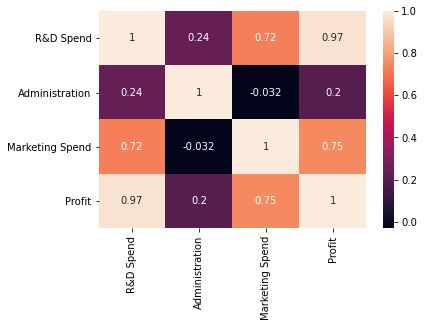

In [24]:
# 1
sns.heatmap ( df.corr()  , annot=True ) ;

* R&D Spend is 97% related to Profit
* Marketing Spend is 75% related to Profit

In [25]:
# 2
pd.pivot_table  ( df  , index='State'  ,  values='Profit'  ,  aggfunc= 'sum' )

,Profit
State,
California,1766387.98
Florida,1900384.39
New York,1933859.59
